In [90]:
import pandas as pd
import numpy as np


In [91]:
df = pd.read_csv("D:\\ML-DataSets\\titanic_toy.csv")

In [92]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [93]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [94]:
df_new = df.dropna()

In [95]:
from sklearn.model_selection import train_test_split

x = df_new.drop(columns=['Survived'])
y = df_new['Survived']

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [98]:
np.mean(cross_val_score(DecisionTreeClassifier(), x, y, cv = 10, scoring='accuracy'))

np.float64(0.6607769973661106)

In [99]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [101]:
import seaborn as sns
from matplotlib import pyplot as plt

In [102]:
from sklearn.impute import SimpleImputer

In [103]:
from sklearn.compose import ColumnTransformer

In [104]:
age_imputer = SimpleImputer(strategy = 'mean')
fare_imputer = SimpleImputer(strategy= 'median')

In [105]:
trf = ColumnTransformer([
    ('age_imputer', age_imputer, ['Age']),
    ('fare_imputer', fare_imputer, ['Fare'])
], remainder = 'passthrough')

In [106]:
x_transformed = trf.fit_transform(x)

x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [107]:
np.mean(cross_val_score(DecisionTreeClassifier(), x_transformed, y, cv = 10, scoring='accuracy'))

np.float64(0.6453058676654182)

In [108]:
x_train_transformed

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.4   ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])

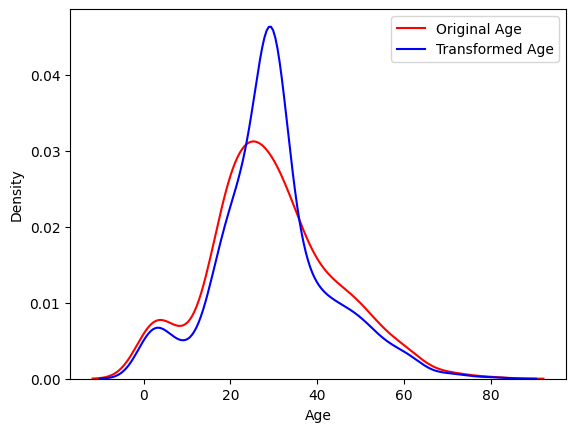

In [109]:
sns.kdeplot(x_train['Age'], color='red',  label='Original Age')
sns.kdeplot(x_train_transformed[:,0], color='blue', label='Transformed Age')
plt.legend()
plt.show()

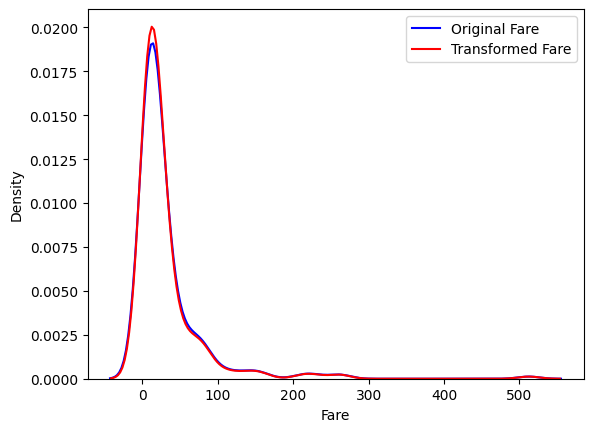

In [110]:
sns.kdeplot(x_train['Fare'], color='blue', label='Original Fare')
sns.kdeplot(x_train_transformed[:,1], color='red', label = 'Transformed Fare')
plt.legend()
plt.show()